### data_link = https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset

In [21]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Paths and settings
base_path = r"C:\Users\yor_name\Downloads\folder_name"  # <-- Replace YourName
categories = ['Cat', 'Dog']
image_size = (128, 128)

# Image loading function
def load_images(base_path, categories, image_size):
    X = []
    y = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)
        for file in os.listdir(folder_path):
            if not file.startswith("._") and file.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    img_path = os.path.join(folder_path, file)
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize(image_size)
                    X.append(np.array(img))
                    y.append(label)
                except Exception as e:
                    print(f"Error loading {file}: {e}")
    return np.array(X), np.array(y)

# Load all data
X, y = load_images(base_path, categories, image_size)

# Shuffle data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]
# taking small data for computencial power
X = X[:15000]
y = y[:15000]

# Train tzst split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirming result
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Unique labels:", np.unique(y_train), np.unique(y_test))


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'C:\\Users\\yor_name\\Downloads\\folder_name\\Cat'

### image verification

In [2]:
import matplotlib.pyplot as plt

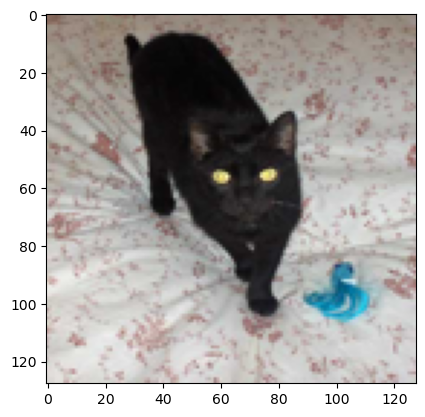

In [3]:
plt.imshow(X_train[1])

### normalising the image

In [4]:
X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
X_train[:10000]
y_train[:10000]

array([0, 0, 0, ..., 1, 0, 0])

### setup model 1 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten
import tensorflow as tf
model=Sequential([
    Conv2D(10,3,activation="elu",input_shape=(128,128,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10,3,activation="elu"),
    Conv2D(10,3,activation="elu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10,3,activation="elu"),
    Conv2D(10,3,activation="elu"),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(16,activation="elu"),
    Dense(1,activation="sigmoid"),
    
])

model.compile(loss="BinaryCrossentropy",
             optimizer=tf.optimizers.Adam(learning_rate=0.001),
             metrics=["Accuracy"])
status=model.fit(X_train[:15000],y_train[:15000],epochs=50)

C:\Users\baher\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)

KeyboardInterrupt



In [7]:
import pandas as pd

In [8]:
pd.DataFrame(status.history).plot()


KeyboardInterrupt



In [ ]:
model.evaluate(X_test[15001:24998],y_test[15001:24991])

### model with less epochs

In [26]:
model_1=Sequential([
    Conv2D(10,3,activation="elu",input_shape=(128,128,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10,3,activation="elu"),
    Conv2D(10,3,activation="elu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10,3,activation="elu"),
    Conv2D(10,3,activation="elu"),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(16,activation="elu"),
    Dense(1,activation="sigmoid"),
    
])

model_1.compile(loss="BinaryCrossentropy",
             optimizer=tf.optimizers.Adam(learning_rate=0.001),
             metrics=["Accuracy"])
status_1=model_1.fit(X_train[:1000],y_train[:1000],epochs=15,validation_split=0.2)

C:\Users\baher\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - Accuracy: 0.5130 - loss: 0.6939 - val_Accuracy: 0.5450 - val_loss: 0.6920
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - Accuracy: 0.5408 - loss: 0.6933 - val_Accuracy: 0.5350 - val_loss: 0.6876
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - Accuracy: 0.6162 - loss: 0.6686 - val_Accuracy: 0.5900 - val_loss: 0.6737
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - Accuracy: 0.6432 - loss: 0.6488 - val_Accuracy: 0.6250 - val_loss: 0.6730
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - Accuracy: 0.6954 - loss: 0.6058 - val_Accuracy: 0.5950 - val_loss: 0.6775
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - Accuracy: 0.6887 - loss: 0.5944 - val_Accuracy: 0.5850 - val_loss: 0.6897
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - Accuracy: 0.7231 - loss: 0.5390 - val_Accuracy: 0.6000 - val_loss: 0.7283
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - Accuracy: 0.7862 - loss: 0.4632 - val_Accuracy: 0.5900 - v

<Axes: >

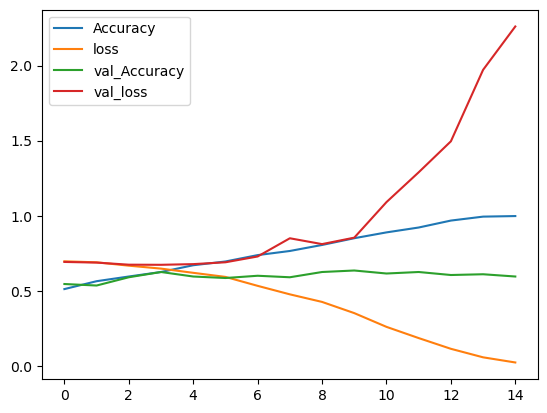

In [27]:
pd.DataFrame(status_1.history).plot()

In [28]:
model_1.evaluate(X_test,y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - Accuracy: 0.6264 - loss: 1.8772


[1.9757285118103027, 0.6141999959945679]

### MODEL UPGRADED

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model_2 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, 3, activation='relu'),
    BatchNormalization(),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),  # Lower LR helps stabilize
    metrics=["accuracy"]
)

status_2 = model_2.fit(
    X_train,y_train,
    epochs=20,validation_split=0.2)


C:\Users\baher\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 256s 823ms/step - accuracy: 0.5077 - loss: 1.1946 - val_accuracy: 0.5175 - val_loss: 2.0864
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 234s 779ms/step - accuracy: 0.5795 - loss: 0.6770 - val_accuracy: 0.4929 - val_loss: 3.2616
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 226s 754ms/step - accuracy: 0.5857 - loss: 0.6959 - val_accuracy: 0.5946 - val_loss: 1.9684
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 223s 742ms/step - accuracy: 0.6583 - loss: 0.6289 - val_accuracy: 0.6650 - val_loss: 0.6876
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 224s 746ms/step - accuracy: 0.6907 - loss: 0.5908 - val_accuracy: 0.6313 - val_loss: 0.9959
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 223s 745ms/step - accuracy: 0.7041 - loss: 0.5722 - val_accuracy: 0.7392 - val_loss: 0.5400
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 289s 962ms/step - accuracy: 0.7335 - loss: 0.5278 - val_accuracy: 0.6988 - val_loss: 0.5498
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 230s 767ms/step - accuracy: 0.7692 -

In [8]:
import pandas as pd

<Axes: >

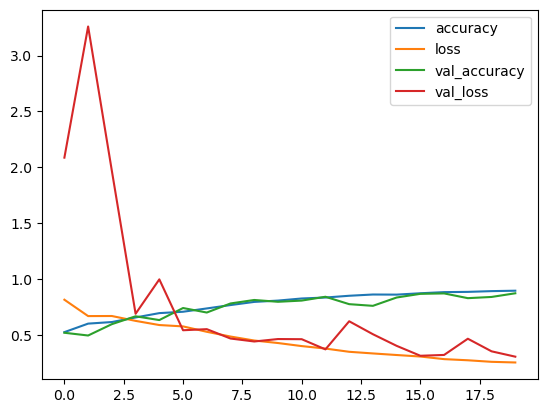

In [9]:
pd.DataFrame(status_2.history).plot()

In [12]:
model_2.evaluate(X_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8694 - loss: 0.3251


[0.3217199146747589, 0.8673333525657654]

In [13]:
model_2.save("cat_dog_clasific.keras")

### CONFUSION MATRIX

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Predict probabilities
y_probs = model_2.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_probs > 0.5).astype("int32")


94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1220  270]
 [ 128 1382]]


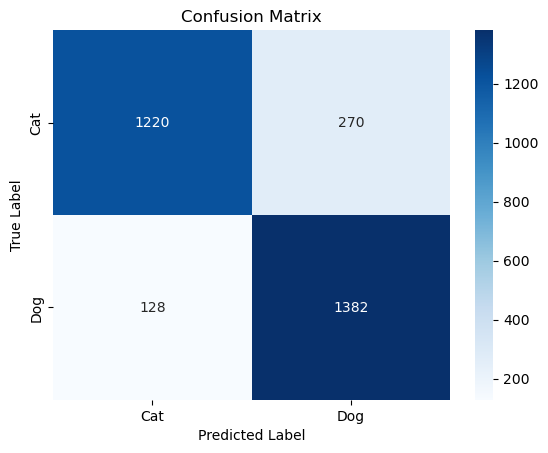

In [18]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cat", "Dog"],
            yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [19]:
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

              precision    recall  f1-score   support

         Cat       0.91      0.82      0.86      1490
         Dog       0.84      0.92      0.87      1510

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000

